In [3]:
import os

import numpy as np 
import pandas as pd

import json
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras

from IPython.display import Image

In [6]:
DATA_DIR = 'Data Visualization/data'
IMAGE_DIR = 'Data Visualization/images'
NO_OF_FILES = len(os.listdir(DATA_DIR))

In [7]:
def json_to_df(file_number):
    car_json = json.load(open(DATA_DIR + '/' + str(file_number) + '.json'))
    df = pd.json_normalize(car_json)
    return df

def read_image(file_number):
    #return Image(IMAGE_DIR + '/' + str(file_number) + '.jpg')
    img = cv2.imread(IMAGE_DIR + '/' + str(file_number) + '.jpg')
    return img

In [48]:
df1 = json_to_df(1)
df1

,id,type,to_name,from_name,value.choices,image_rotation,original_width,original_height,value.points,value.polygonlabels
0,XJMOJPtwvU,choices,image,CarSide,[PassengerSide],NaN,NaN,NaN,NaN,NaN
1,Aq6nkgCbWc,polygonlabels,image,label,NaN,0.0,710.0,533.0,"[[3.4166737705501578, 53.19465654365013], [5.2...",[Bumper]
2,pW0dcvGbPl,polygonlabels,image,label,NaN,0.0,710.0,533.0,"[[90.01279974762264, 57.04574936339278], [90.6...",[Bumper]
3,lvg4a99qqM,polygonlabels,image,label,NaN,0.0,710.0,533.0,"[[3.219557976095341, 52.75703235958848], [4.40...",[Light]
4,tISDOKIXdd,polygonlabels,image,label,NaN,0.0,710.0,533.0,"[[90.01279974762264, 38.66553363280291], [90.5...",[Light]
5,RTxgef7iqW,polygonlabels,image,label,NaN,0.0,710.0,533.0,"[[5.847768568826231, 46.105144761851186], [9.7...",[Bonnet]
6,-EkB-UL-gQ,polygonlabels,image,label,NaN,0.0,710.0,533.0,"[[25.362232219853095, 35.95226369162061], [24....",[Windshield]
7,skWsFXb5SU,polygonlabels,image,label,NaN,0.0,710.0,533.0,"[[31.21000078867933, 36.127313365245264], [31....",[Mirror]
8,SU8lojcwIq,polygonlabels,image,label,NaN,0.0,710.0,533.0,"[[9.461558133831202, 70.43704939567968], [9.52...",[Wheel]
9,9lQXxJRbk4,polygonlabels,image,label,NaN,0.0,710.0,533.0,"[[76.54322045987679, 68.86160233305768], [76.8...",[Wheel]


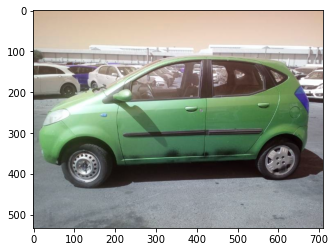

In [9]:
plt.imshow(read_image(1))

In [46]:
def denorm(points,width,height):
#     if points == None:
#         return
    denorm_points = []
    print(''%%%',points)
    for point in points:
        x = (point[0]*width)/100
        y = (point[1]*height)/100        
        denorm_points.append([x,y])
    return denorm_points

SyntaxError: invalid syntax (3606546533.py, line 5)

In [ ]:
img_width = df1['original_width'][1]
img_height = df1['original_height'][1]

In [60]:
temp = df1.copy()
temp = temp.drop([0], axis=0)

In [61]:
temp['denorm_points'] = temp['value.points'].apply(lambda x: denorm(x,img_width,img_height))
temp.head()

,id,type,to_name,from_name,value.choices,image_rotation,original_width,original_height,value.points,value.polygonlabels,denorm_points
1,Aq6nkgCbWc,polygonlabels,image,label,NaN,0.0,710.0,533.0,"[[3.4166737705501578, 53.19465654365013], [5.2...",[Bumper],"[[24.25838377090612, 283.5275193776552], [37.3..."
2,pW0dcvGbPl,polygonlabels,image,label,NaN,0.0,710.0,533.0,"[[90.01279974762264, 57.04574936339278], [90.6...",[Bumper],"[[639.0908782081207, 304.0538441068835], [643...."
3,lvg4a99qqM,polygonlabels,image,label,NaN,0.0,710.0,533.0,"[[3.219557976095341, 52.75703235958848], [4.40...",[Light],"[[22.85886163027692, 281.1949824766066], [31.2..."
4,tISDOKIXdd,polygonlabels,image,label,NaN,0.0,710.0,533.0,"[[90.01279974762264, 38.66553363280291], [90.5...",[Light],"[[639.0908782081207, 206.08729426283952], [642..."
5,RTxgef7iqW,polygonlabels,image,label,NaN,0.0,710.0,533.0,"[[5.847768568826231, 46.105144761851186], [9.7...",[Bonnet],"[[41.51915683866624, 245.7404215806668], [69.5..."


In [63]:
img1 = read_image(1)

In [77]:
poly = np.array(temp.denorm_points[1],dtype=np.int32)
poly.shape

(20, 2)

In [78]:
poly_new=poly.reshape((-1,1,2))
poly_new.shape

(20, 1, 2)

In [79]:
poly

array([[ 24, 283],
       [ 37, 281],
       [ 55, 275],
       [ 69, 269],
       [ 78, 281],
       [ 87, 288],
       [107, 311],
       [ 94, 314],
       [ 80, 323],
       [ 71, 335],
       [ 66, 347],
       [ 66, 363],
       [ 67, 378],
       [ 39, 372],
       [ 30, 367],
       [ 26, 353],
       [ 22, 338],
       [ 17, 325],
       [ 13, 311],
       [ 15, 297]], dtype=int32)

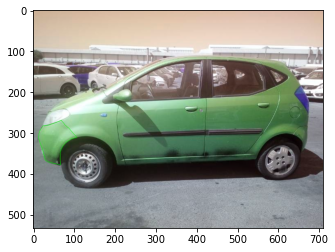

In [81]:
cv2.polylines(img1,[poly_new],isClosed=True,color=(0,255,0))
plt.imshow(img1)